## Simulation 3 Qubits

In [46]:
import qutip.testing as qt
#qt.run()

In [47]:
from qutip import *

In [48]:
import numpy as np
import matplotlib.pyplot as plt


Consider the general trancated hamiltonian of a 3-qubit system with coupling of the form:

$H_{{\rm trun}}=\frac{1}{2}\sum_{\alpha}\omega_{\alpha}\sigma_{z,\alpha}+\sum_{\alpha<\beta}g_{\alpha\beta}\sigma_{i_{\alpha},\alpha}\sigma_{j_{\beta},\beta} $


where $i_{\alpha},j_{\beta}\in\{x,y,z\}$. Our first apporach will consist in simulate this system in abscense of noise, also due to the common use of the coupling $xx$ and $zz$ then we will consider that $i_{\alpha}=j_{\beta}$. Under these conditions our hamiltonian takes the form:

$H_{1,{\rm trun}}=\frac{1}{2}\sum_{\alpha}\omega_{\alpha}\sigma_{z,\alpha}+\sum_{\alpha<\beta}g_{\alpha\beta}\sigma_{i,\alpha}\sigma_{i,\beta} $

we had set $\hbar=1$ in our modelling.

In [49]:
omega=[1,2,3]  #Set of frequencies of each qubit
coupling_constants=[0.1,0.4,0.8]   #12, 23, 31

H1=(1/2)*omega[0]*tensor(sigmaz(), identity(2), identity(2))
H2=(1/2)*omega[0]*tensor(identity(2),sigmaz(), identity(2))
H3=(1/2)*omega[0]*tensor(identity(2),identity(2),sigmaz())


def Matrix_Pauli(Latindex):
    if Latindex=='x' or Latindex==1:
        return sigmax()
    elif Latindex=='y' or Latindex==2:
        return sigmay()
    elif Latindex=='z' or Latindex==3:
        return sigmaz()

Latin_index=1


H12=coupling_constants[0]*tensor(Matrix_Pauli(Latin_index),Matrix_Pauli(Latin_index), identity(2))
H23=coupling_constants[1]*tensor(identity(2),Matrix_Pauli(Latin_index),Matrix_Pauli(Latin_index))
H31=coupling_constants[2]*tensor(Matrix_Pauli(Latin_index),identity(2),Matrix_Pauli(Latin_index))



H=H1+H2+H3+H12+H23+H31  #Composed hamiltonian


psi0=basis(8, 0)   #Initial state
times = np.linspace(0.0, 100.0, 5000)


In [50]:
#Master-Equation Solver

result = mesolve(H, psi0, times, [], [])


def List_fin(array_states,i):
    List_first=[]
    for j in array_states:
        List_first.append(np.abs(complex(j[i]))**2)
    return List_first

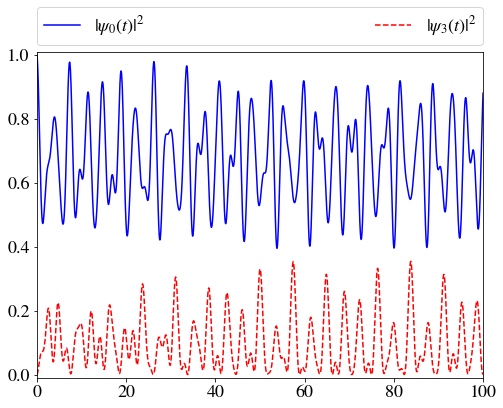

In [51]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)



plt.plot(times, List_fin(result.states,0),label='$|\psi_{0}(t)|^2 $',color='blue')
#plt.plot(times, List_fin(result.states,1),label='$|\psi_{1}(t)|^2 $')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,2),label='$|\psi_{2}(t)|^2 $')  #Does not activate for |0> 
plt.plot(times, List_fin(result.states,3),label='$|\psi_{3}(t)|^2 $',color='red',linestyle='--')
#plt.plot(times, List_fin(result.states,4),label='$|\psi_{4}(t)|^2$')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,5),label='$|\psi_{5}(t)|^2 $',color='green')  
#plt.plot(times, List_fin(result.states,6),label='$|\psi_{6}(t)|^2 $',color='orange')
#plt.plot(times, List_fin(result.states,7),label='$|\psi_{7}(t)|^2 $')  #Does not activate

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim(-0.01,100.01)
plt.ylim(-0.01,1.01);

In [52]:
#Monte-Carlo Solver

resultmc = mcsolve(H, psi0, times, [], [])


def List_fin(array_states,i):
    List_first=[]
    for j in array_states:
        List_first.append(np.abs(complex(j[i]))**2)
    return List_first

No c_ops, using sesolve
10.0%. Run time:   0.08s. Est. time left: 00:00:00:00
20.0%. Run time:   0.14s. Est. time left: 00:00:00:00
30.0%. Run time:   0.22s. Est. time left: 00:00:00:00
40.0%. Run time:   0.30s. Est. time left: 00:00:00:00
50.0%. Run time:   0.38s. Est. time left: 00:00:00:00
60.0%. Run time:   0.46s. Est. time left: 00:00:00:00
70.0%. Run time:   0.56s. Est. time left: 00:00:00:00
80.0%. Run time:   0.63s. Est. time left: 00:00:00:00
90.0%. Run time:   0.70s. Est. time left: 00:00:00:00
Total run time:   0.79s


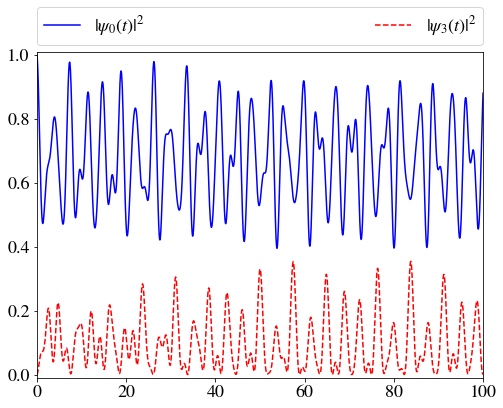

In [53]:
import matplotlib
matplotlib.rcParams['text.usetex'] = False
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)



plt.plot(times, List_fin(resultmc.states,0),label='$|\psi_{0}(t)|^2 $',color='blue')
#plt.plot(times, List_fin(result.states,1),label='$|\psi_{1}(t)|^2 $')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,2),label='$|\psi_{2}(t)|^2 $')  #Does not activate for |0> 
plt.plot(times, List_fin(resultmc.states,3),label='$|\psi_{3}(t)|^2 $',color='red',linestyle='--')
#plt.plot(times, List_fin(result.states,4),label='$|\psi_{4}(t)|^2$')  #Does not activate for |0>
#plt.plot(times, List_fin(result.states,5),label='$|\psi_{5}(t)|^2 $',color='green')  
#plt.plot(times, List_fin(result.states,6),label='$|\psi_{6}(t)|^2 $',color='orange')
#plt.plot(times, List_fin(result.states,7),label='$|\psi_{7}(t)|^2 $')  #Does not activate

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)

plt.xlim(-0.01,100.01)
plt.ylim(-0.01,1.01);

So far we had set the basic elements to get the unitary dynamics from our hamiltonian, up to parameters that can be set by the user. Now we will try to define the hamiltonian for a CNOT gate in order to simulate the generation of a GHZ state.

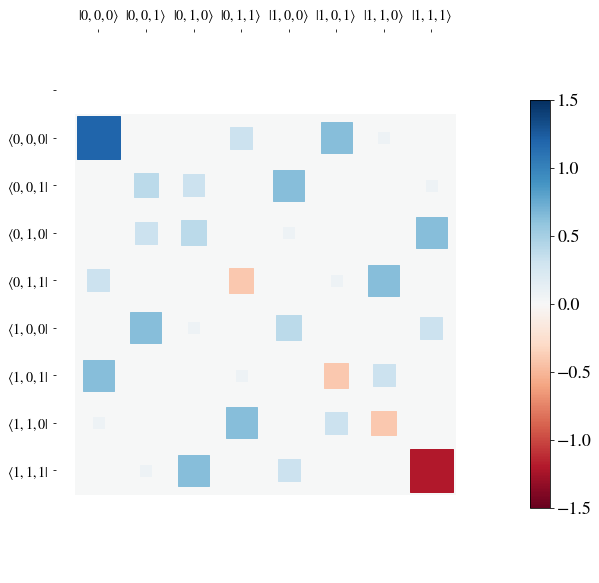

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
hinton(H, ax=ax);